# 필요 라이브러리

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
#from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import random

#from ggplot import *
#from scipy.stats import logistic
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix, mean_squared_error
#from sklearn.model_selection import train_test_split
#from sklearn import preprocessing
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import *
#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
#import graphviz
#from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
#from sklearn.svm import SVC, SVR

# 한글 폰트 실행
from matplotlib import rcParams
from matplotlib import font_manager,rc
rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='NanumGothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)


# 데이터 불러오기

In [2]:
import pandas as pd
DATA_PATH = './dataset/CARD/'
DATA_PATH_2 = './dataset/CUSTOMER/'
DATA_PATH_3 = './dataset/CC/'
cc_22_40_raw = pd.read_csv(DATA_PATH_3 + 'cc_22_40(raw).csv', encoding="utf-8-sig")
cc_22_50_raw = pd.read_csv(DATA_PATH_3 + 'cc_22_50(raw).csv', encoding="utf-8-sig")
cc_22_60_raw = pd.read_csv(DATA_PATH_3 + 'cc_22_60(raw).csv', encoding="utf-8-sig")
cc_22_40 = pd.read_csv(DATA_PATH_3 + 'cc_22_40.csv', encoding="utf-8-sig")
cc_22_50 = pd.read_csv(DATA_PATH_3 + 'cc_22_50.csv', encoding="utf-8-sig")
cc_22_60 = pd.read_csv(DATA_PATH_3 + 'cc_22_60.csv', encoding="utf-8-sig")

In [3]:
customer_22 = pd.read_csv(DATA_PATH_2 + 'customer_22.csv', encoding='euc-kr')

In [4]:
card_22 = pd.read_csv(DATA_PATH + 'card_22.csv', encoding='utf-8-sig')

# 사용자 정의함수

## 시간체크함수

In [8]:
import time

def execution_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        hours, rem = divmod(elapsed_time, 3600)
        minutes, seconds = divmod(rem, 60)
        print(f"Execution time for {func.__name__}: {int(hours)}h {int(minutes)}m {seconds:.2f}s")
        return result
    return wrapper

## 용량 줄이는 함수

### int64 -> int32 , float64 -> float32

In [9]:
import pandas as pd 
import numpy as np

def reduce_mem_usage(df, float16_as32=True):
    # memory_usage()는 데이터프레임의 각 열의 메모리 사용량을 계산하고, sum은 그 값을 합산합니다. B -> KB -> MB로 변환합니다.
    start_mem = df.memory_usage().sum() / 1024**2
    print('데이터프레임의 초기 메모리 사용량은 {:.2f} MB입니다.'.format(start_mem))

    for col in df.columns:  # 각 열의 이름을 반복합니다.
        col_type = df[col].dtype  # 열의 데이터 타입을 가져옵니다.
        if col_type != object and str(col_type) != 'category':  # 객체 타입이 아닌 수치형 변수만 처리합니다.
            c_min, c_max = df[col].min(), df[col].max()  # 해당 열의 최소값과 최대값을 계산합니다.
            if str(col_type)[:3] == 'int':  # 정수형 변수일 경우 (int8, int16, int32, int64 모두 포함)
                # 이 열의 값 범위가 int8의 범위에 있을 경우 타입을 int8로 변환합니다. (-128부터 127까지)
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                # 이 열의 값 범위가 int16의 범위에 있을 경우 타입을 int16으로 변환합니다. (-32,768부터 32,767까지)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                # 이 열의 값 범위가 int32의 범위에 있을 경우 타입을 int32로 변환합니다. (-2,147,483,648부터 2,147,483,647까지)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                # 이 열의 값 범위가 int64의 범위에 있을 경우 타입을 int64로 변환합니다. (-9,223,372,036,854,775,808부터 9,223,372,036,854,775,807까지)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:  # 실수형일 경우
                # 값이 float16의 범위에 있을 경우 타입을 변환합니다. 더 높은 정밀도가 필요하면 float32를 고려합니다.
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    if float16_as32:  # 더 높은 정밀도가 필요하면 float32를 선택할 수 있습니다.
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float16)
                # 값이 float32의 범위에 있을 경우 타입을 float32로 변환합니다.
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                # 값이 float64의 범위에 있을 경우 타입을 float64로 변환합니다.
                else:
                    df[col] = df[col].astype(np.float64)
    # 최종 메모리 사용량을 계산합니다.
    end_mem = df.memory_usage().sum() / 1024**2
    print('최적화 후 데이터프레임의 메모리 사용량은: {:.2f} MB입니다.'.format(end_mem))
    # 초기 메모리 사용량과 비교하여 몇 퍼센트 감소했는지 계산합니다.
    print('메모리 사용량이 {:.1f}% 감소했습니다.'.format(100 * (start_mem - end_mem) / start_mem))

    return df

### 문자열(str, object), int32, float32로 바꾸는 함수

In [10]:
@execution_time
def clean_df(data):
    data['고객ID'] = data['고객ID'].astype(str)
    data = reduce_mem_usage(data)
    print(data.info())
    return data

In [11]:
# 사용 예시
test1 = clean_df(customer_22)

데이터프레임의 초기 메모리 사용량은 2140.22 MB입니다.
최적화 후 데이터프레임의 메모리 사용량은: 1564.01 MB입니다.
메모리 사용량이 26.9% 감소했습니다.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21578686 entries, 0 to 21578685
Data columns (total 13 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   기준년월      int32 
 1   고객ID      object
 2   연령대       object
 3   성별        object
 4   고객등급      object
 5   자택_시도     object
 6   자택_시군구    object
 7   수신_요구불예금  int32 
 8   수신_거치식예금  int32 
 9   수신_적립식예금  int32 
 10  수신_펀드     int32 
 11  수신_외화예금   int32 
 12  대출금액      int32 
dtypes: int32(7), object(6)
memory usage: 1.5+ GB
None
Execution time for clean_df: 0h 0m 2.10s


In [12]:
# 사용 예시
test2 = reduce_mem_usage(customer_22)

데이터프레임의 초기 메모리 사용량은 1564.01 MB입니다.
최적화 후 데이터프레임의 메모리 사용량은: 1564.01 MB입니다.
메모리 사용량이 0.0% 감소했습니다.


In [13]:
customer_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21578686 entries, 0 to 21578685
Data columns (total 13 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   기준년월      int32 
 1   고객ID      object
 2   연령대       object
 3   성별        object
 4   고객등급      object
 5   자택_시도     object
 6   자택_시군구    object
 7   수신_요구불예금  int32 
 8   수신_거치식예금  int32 
 9   수신_적립식예금  int32 
 10  수신_펀드     int32 
 11  수신_외화예금   int32 
 12  대출금액      int32 
dtypes: int32(7), object(6)
memory usage: 1.5+ GB


## 1차 프로젝트 사용 함수

### 고객연령대별 추출

In [14]:
def customer_generation(df, feature): # feature에 뽑고 싶은 연령대를 입력한다. "연령대"
    df = df[df['연령대'].isin([f'{feature}'])]
    print(f'{feature}만 추출한 데이터프레임입니다.')
    print(df.head())
    return df

In [15]:
# 사용 예시
test3 = customer_generation(customer_22, "40대")

40대만 추출한 데이터프레임입니다.
       기준년월        고객ID  연령대 성별  고객등급  자택_시도 자택_시군구  수신_요구불예금  수신_거치식예금  \
712  202212  9997377777  40대  남  일반등급  서울특별시    강북구         0         0   
713  202212  9997372016  40대  남  일반등급  대구광역시     동구   7600000         0   
714  202212  9997367955  40대  여  일반등급   경상북도    영주시    200000         0   
715  202212  9997366851  40대  여  일반등급  대구광역시    수성구    300000         0   
716  202212  9997365476  40대  여  일반등급  대구광역시     중구         0         0   

     수신_적립식예금  수신_펀드  수신_외화예금  대출금액  
712         0      0        0     0  
713         0      0        0     0  
714         0      0        0     0  
715         0      0        0     0  
716         0      0        0     0  


### 고객연령대 나눈 데이터프레임에서, ID 중복없이 추출

In [16]:
def customer_generation_id(df):
    selected_df = df.loc[:, ['고객ID', '연령대']]
    df_edit = pd.DataFrame(selected_df['고객ID'].unique(), columns=['고객ID'])
    print(df_edit.head())
    return df_edit

In [17]:
# 사용 예시 
test4 = customer_generation_id(test3)

         고객ID
0  9997377777
1  9997372016
2  9997367955
3  9997366851
4  9997365476


### 고객 연령대 나누고, 바로 id를 DataFrame으로 추출
- feature에 연령대 명을 정확히 입력하면, 해댱하는 id를 바로 추출할 수 있다
- 입력안하면 전체 연령대의 고객 ID만 추출한다.

In [51]:
#def customer_gen_id(df, feature=None): # feature에 뽑고 싶은 연령대를 입력한다. 예: "60대이상", "40대"
#    df_filtered = df[df['연령대'].isin([f'{feature}'])]
#    selected_df = df_filtered.loc[:, ['고객ID', '연령대']]
#    df_edit = pd.DataFrame(selected_df['고객ID'].unique(), columns=['고객ID'])
#    print(df_edit.head())
#    return df_edit

In [19]:
# 사용 예시
test5 = customer_gen_id(customer_22, "40대")

         고객ID
0  9997377777
1  9997372016
2  9997367955
3  9997366851
4  9997365476


In [52]:
def customer_gen_id(df, feature=None, show_age=False):  # show_age 매개변수 추가
    df_filtered = df[df['연령대'].isin([f'{feature}'])]
    selected_df = df_filtered.loc[:, ['고객ID', '연령대']]
    
    if show_age:  # show_age가 True일 때 고객ID와 연령대 포함
        df_edit = selected_df.drop_duplicates(subset=['고객ID', '연령대'])
    else:  # show_age가 False일 때 고객ID만 포함
        df_edit = pd.DataFrame(selected_df['고객ID'].unique(), columns=['고객ID'])
    
    print(df_edit.head())
    return df_edit

In [53]:
test5_1 = customer_gen_id(customer_22, "40대", show_age=False)

         고객ID
0  9997377777
1  9997372016
2  9997367955
3  9997366851
4  9997365476


In [54]:
test5_2 = customer_gen_id(customer_22, "40대", show_age=True)

           고객ID  연령대
712  9997377777  40대
713  9997372016  40대
714  9997367955  40대
715  9997366851  40대
716  9997365476  40대


### 가맹업종명 재분류

In [20]:
@execution_time
def rename_category_store(df):
    mapping = {
        '교육/학원': ['보습학원', '예·체능계학원', '외국어학원', '기타 교육기관', '기능학원', '학원', '학습지교육', '초중고교육기관'],
        '미용': ['미용원', '피부미용실'],
        '스포츠/레저': ['기타레져업소', '스포츠·레져용품', '스포츠의류', '스크린골프', '헬스클럽', '골프경기장', '종합레져타운', '골프용품 전문점', '골프연습장', '안마/스포츠마사지', '레져업소', '수 영 장'],
        '여행/교통': ['기타숙박업', '철도', '특급호텔', '1급 호텔', '렌터카', '항공사', '콘도', '2급 호텔', '관광여행', '여객선', '고속버스', '택시'],
        '외식': ['일반한식', '주점', '서양음식', '중국식', '일식·회집', '한정식', '칵테일바', '갈비전문점'],
        '대형마트': ['슈퍼마켓', '농협하나로클럽', '농,축협직영매장', '대형할인점'],
        '백화점': ['면 세 점', '자사카드발행백화점'],
        '편의점': ['편 의 점'],
        '음식료품': ['정육점', '스넥', '농·축·수산품', '농축수산가공품', '주류판매점', '홍삼제품', '인삼제품', '기타건강식품'],
        '카페/베이커리': ['기타음료식품', '제과점'],
        '의료/보험': ['약 국', '의 원', '한 의 원', '치과의원', '기타의료기관 및 기타의료기기', '한약방', '한방병원', '생명보험', '건강진단', '기타보험', '병 원(응급실운영)', '치과병원', '동물병원', '종합병원', '손해보험'],
        '주유': ['SK주유소', '쌍용S-OIL', 'GS주유소', '주유소', 'SK가스충전소', '현대정유(오일뱅크)', 'GS가스충전소', '쌍용S-OIL가스충전소', '현대정유가스충전소', 'E1가스충전소', '전기차충전소'],
        '문화생활': ['문화취미기타', '영화관', '티켓'],
        '이동통신요금': ['이동통신요금'],
        '반려동물': ['애완동물'],
        '간편결제': ['인터넷P/G'],
        '기타': ['전자상거래상품권전문판매', '캐주얼의류', 'CATV', '택시회사', '위성방송', '음반영상물', '제 화','주방용구', '연 쇄 점', '액세서리', '전문서적', '주차장', '민예·공예품', '건축용 요업제품', '단란주점', '옷감·직물', '자동차시트·타이어', '독서실', '농기계', '조명기구', '세차장', '사무서비스', '컴퓨터', '가 방', '보일러·펌프·샷시', '카페트,커튼,천막,지물', '자동차부품', '자동차정비', '기타유통업', '이륜차판매', '카인테리어', '화물운송', '내의판매', '목재·석재·철물', '기타 사무용품', '기타가구', '신 발', '비영리/비대상', '기타대인서비스', '기타전기제품', 'DP&E', '주방용식기', '가타자동차서비스', '기타농업관련', '구내매점(국가기관등)', '아동의류', '이용원', '조세서비스', '기념품점', '유흥주점', '통신기기', '화원', '화장품', '기타잡화', '유아원', 'LPG취급점', '페인트', '출판 및 인쇄물', '귀금속', '문구용품', '위탁급식업', '비료,사료,종자', '침구·수예점', '당구장', '가전제품', '인터넷Mall', '가정용품수리', '사무·통신기기수리', '안경', '세탁소', '사우나', '일반서적', '노 래 방', '기계공구',  '완구점', '기타의류', '미곡상', '기타용역서비스', '기타수리서비스', '기타건축자재', '일반가구', '사무용 OA기기', '인테리어전문', '가례서비스업', '시 계', '비영리/대상', '윤활유전문판매', '정수기', '공공요금대행서비스/소득공제비대상', '화방·표구점', '볼 링 장', '인터넷종합Mall', '기타 전문점', '통신판매업1', '종합용역', '전자상거래상품권', '보관및 창고업', '유류판매', '업종미등록', '통신서비스/소득공제비대상', '기타서적문구', '수족관', '공공요금대행서비스/소득공제대상', '상품권전문판매', '혼례서비스업', '냉열기기', '비씨카드 정산용(할인)', '일반(통신판매)', '기타4', '기타1', '부동산중개·임대', 'CATV홈쇼핑', '소프트웨어', '의료용품', '정장', '맞춤복점', '단체복', '상 품 권', 'PG상품권', '비씨카드 정산용가맹점',  '미용재료']
    }
    for category, values in mapping.items():
        df['가맹점업종명'] = df['가맹점업종명'].replace(values, category)
    print(df['가맹점업종명'].unique())
    return df

In [35]:
# 사용 예시
test6 = rename_category_store(card_22)

['외식' '기타' '미용' '스포츠/레저' '의료/보험' '여행/교통' '카페/베이커리' '주유' '대형마트' '음식료품'
 '편의점' '교육/학원' '문화생활' '간편결제' '반려동물' '백화점' '이동통신요금']
Execution time for rename_category_store: 0h 4m 53.44s


### 지역 재분류

In [22]:
def rename_category_region(df):
    region_groups = {
        '서울특별시': '수도권', '경기도': '수도권', '인천광역시': '수도권',
        '부산광역시': '영남권', '울산광역시': '영남권', '경상남도': '영남권',
        '충청북도': '충청권', '충청남도': '충청권', '대전광역시': '충청권', '세종특별자치시': '충청권',
        '전북특별자치도': '호남권', '전라남도': '호남권', '광주광역시': '호남권',
        '강원특별자치도': '강원·제주권', '제주특별자치도': '강원·제주권'
    }

    df['가맹점_광역시도'] = df['가맹점_광역시도'].replace(region_groups)
    # 원본 데이터 변경할 거면 card_2021['가맹점_광역시도'].replace(region_groups, inplace=True)
    df['가맹점_광역시도'].value_counts()
    return df

In [46]:
# 사용 예시
test7 = rename_category_region(test6)

### join (merge)

In [23]:
def join(df1, df2, key, way): # merge할 두 데이터를 df1, df2에 쓴다. key에 join 할 컬럼 이름 쓴다. way에는 조인 방식 쓴다.
    df_joined= pd.merge(df1, df2, on=f'{key}', how=f'{way}')
    print(type(df_joined))
    print(df_joined.head(3))
    #card_customer_22_40_id.to_csv('cc_22_40.csv', index=False, encoding='utf-8-sig')
    return df_joined

In [39]:
test6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62945850 entries, 0 to 62945849
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   거래년월      int64 
 1   고객ID      int64 
 2   가맹점업종명    object
 3   가맹점_광역시도  object
 4   가맹점_시군구   object
 5   승인건수      object
 6   승인금액      int64 
dtypes: int64(3), object(4)
memory usage: 3.3+ GB


In [40]:
test5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365904 entries, 0 to 365903
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   고객ID    365904 non-null  object
dtypes: object(1)
memory usage: 2.8+ MB


In [41]:
test6 = clean_df(test6)
test6.info()

데이터프레임의 초기 메모리 사용량은 3361.67 MB입니다.
최적화 후 데이터프레임의 메모리 사용량은: 2881.43 MB입니다.
메모리 사용량이 14.3% 감소했습니다.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62945850 entries, 0 to 62945849
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   거래년월      int32 
 1   고객ID      object
 2   가맹점업종명    object
 3   가맹점_광역시도  object
 4   가맹점_시군구   object
 5   승인건수      object
 6   승인금액      int32 
dtypes: int32(2), object(5)
memory usage: 2.8+ GB
None
Execution time for clean_df: 0h 0m 16.94s
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62945850 entries, 0 to 62945849
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   거래년월      int32 
 1   고객ID      object
 2   가맹점업종명    object
 3   가맹점_광역시도  object
 4   가맹점_시군구   object
 5   승인건수      object
 6   승인금액      int32 
dtypes: int32(2), object(5)
memory usage: 2.8+ GB


In [43]:
test8 = join(test6, test5, "고객ID", "inner")

<class 'pandas.core.frame.DataFrame'>
     거래년월        고객ID 가맹점업종명 가맹점_광역시도 가맹점_시군구  승인건수   승인금액
0  202212  5946674163     외식     경상북도     영천시  5번이하  80000
1  202212  7605672934     외식     경상북도     영천시  5번이하  60000
2  202212  7652171123     외식     경상북도     영천시  5번이하  50000


### 연령대와 다른 원하는 컬럼들만 뽑아 dataframe으로 만드는 함수

In [ ]:
#def slicing(df,generation=None,feature=None): # feature에 뽑고 싶은 연령대를 입력한다. 예: "60대이상", "40대"
#    df_filtered = df[df['연령대'].isin([f'{generation}'])]
#    selected_df = df_filtered.loc[:, [f'[{feature}', '연령대']]
#    df_edit = pd.DataFrame(selected_df['고객ID'].unique(), columns=['고객ID'])
#    print(type(df_edit))
#    print(df_edit.head())
#    return df_edit

In [44]:
def slicing(df, generation=None, feature=None):  
    # generation과 feature가 단일 값일 경우 리스트로 변환
    if isinstance(generation, str):  
        generation = [generation]
    if isinstance(feature, str):  
        feature = [feature]
        
    df_filtered = df[df['연령대'].isin(generation)]
    sliced_df = df_filtered.loc[:, feature + ['연령대']]  # feature 리스트와 '연령대' 추가

#    df_edited = pd.DataFrame(selected_df['고객ID'].unique(), columns=['고객ID'])
    
    print(type(sliced_df))
    print(sliced_df.head())
    return sliced_df

In [45]:
test9 = slicing(customer_22, generation=["40대", "50대"], feature=["고객ID","성별", "고객등급"])

<class 'pandas.core.frame.DataFrame'>
           고객ID 성별  고객등급  연령대
414  9998496340  남  일반등급  50대
415  9998491706  여  일반등급  50대
416  9998488435  여  일반등급  50대
417  9998479714  여  일반등급  50대
418  9998477640  남  일반등급  50대


### 세대 - 가맹업종별 승인금액 bar plot

In [80]:
def amount_generation(df, year ,generation=None, top=None, bottom=None, columns=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    total_amounts = df.groupby('가맹점업종명')['승인금액'].sum().reset_index()
    total_amounts_sort = total_amounts.sort_values(by='승인금액', ascending=False)
    if top is not None:
        total_amounts_sort = total_amounts_sort.head(top)
    elif bottom is not None:
        total_amounts_sort = total_amounts_sort.tail(bottom)
    if columns is not None:
        total_amounts_sort = total_amounts_sort[total_amounts_sort['가맹점업종명'].isin(columns)]
    ax = sns.barplot(x='가맹점업종명', y='승인금액', data=total_amounts_sort, palette="viridis")
    ax.set_title(f"{year}년도 {generation} 업종별 승인금액 합계")
    ax.set_xlabel("업종")
    ax.set_ylabel("승인금액 합계")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 1e7:.2f}억',  # 조 단위로 변환 후 소수점 2자리까지 표시
            ha='center',                    # 텍스트 가운데 정렬
            fontsize=8
        )
    ax.text(1, 1.02, "(단위: 억 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
plt.show()

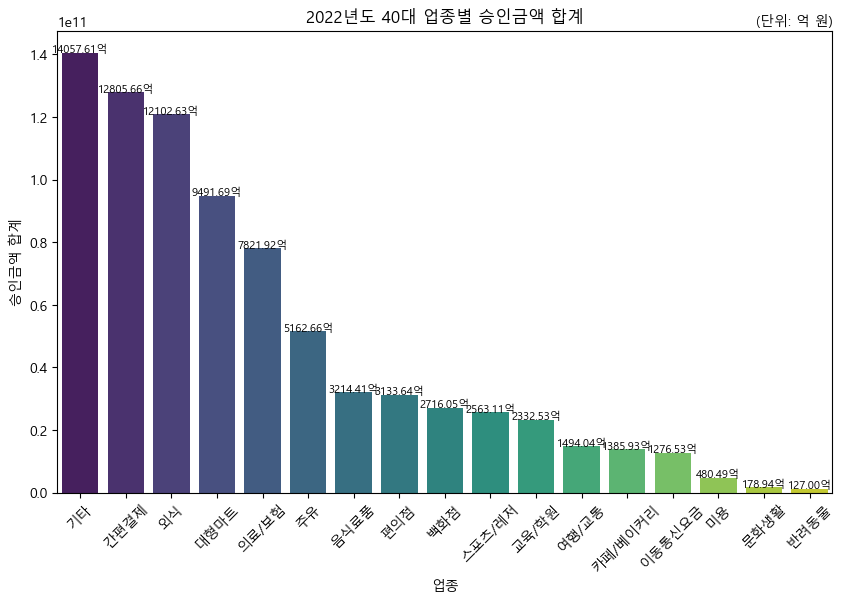

In [62]:
test10 = amount_generation(test8, "2022", "40대")

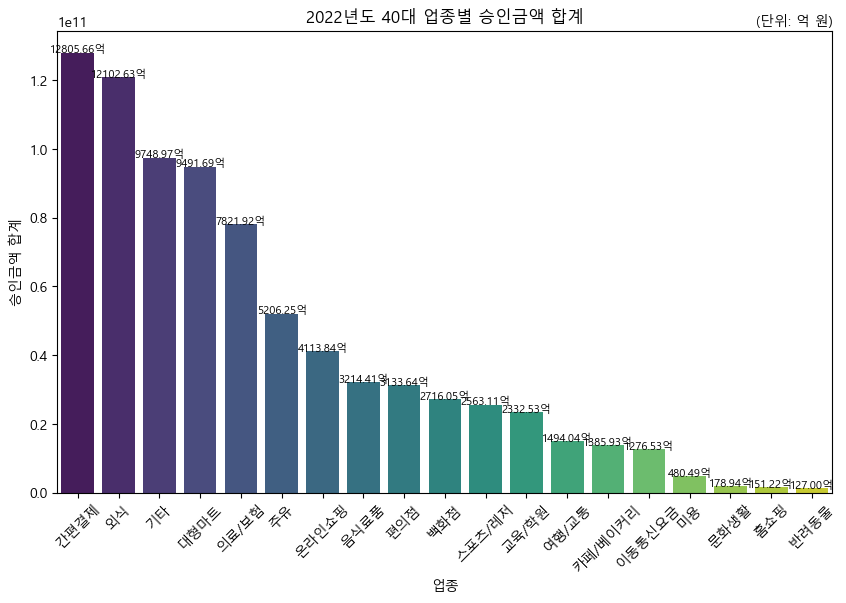

In [57]:
test11 = amount_generation(cc_22_40, "2022", "40대")

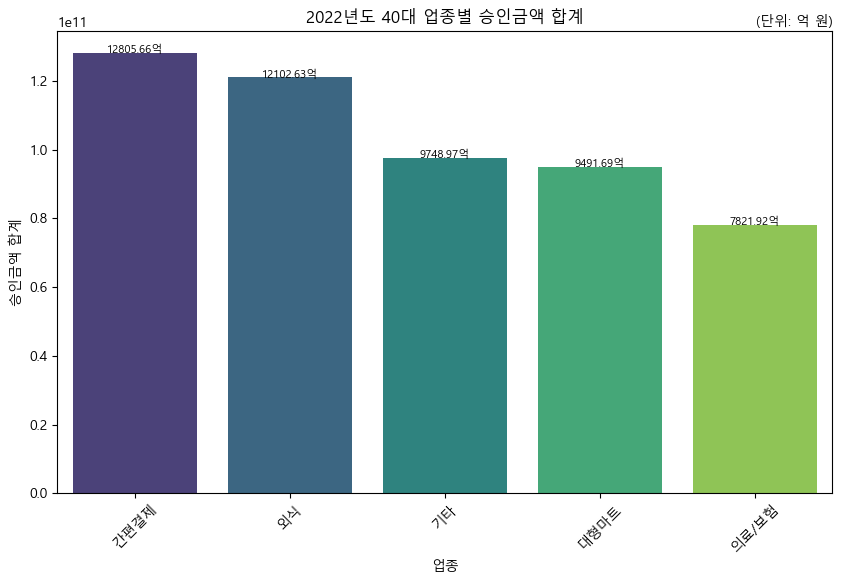

In [64]:
test11_1 = amount_generation(cc_22_40, "2022", "40대", 5)

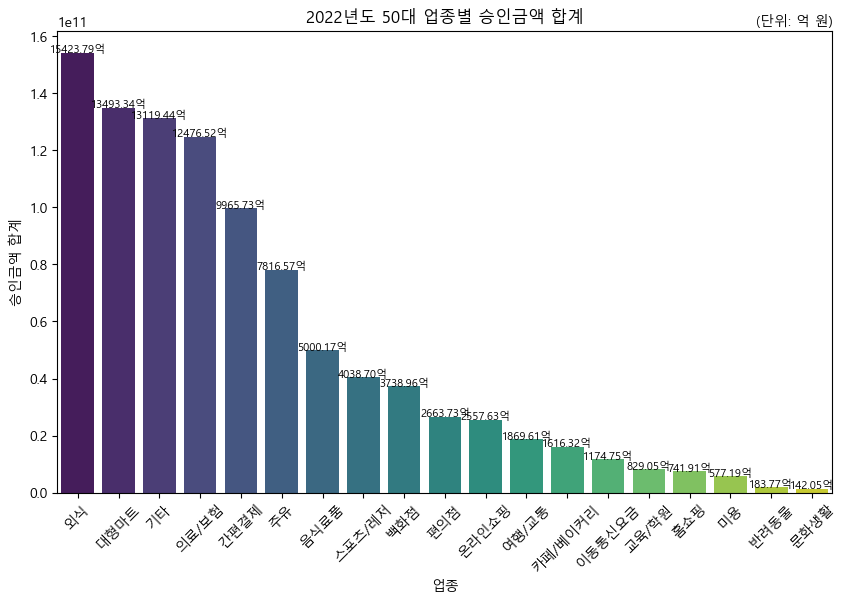

In [58]:
test12 = amount_generation(cc_22_50, "2022", "50대")

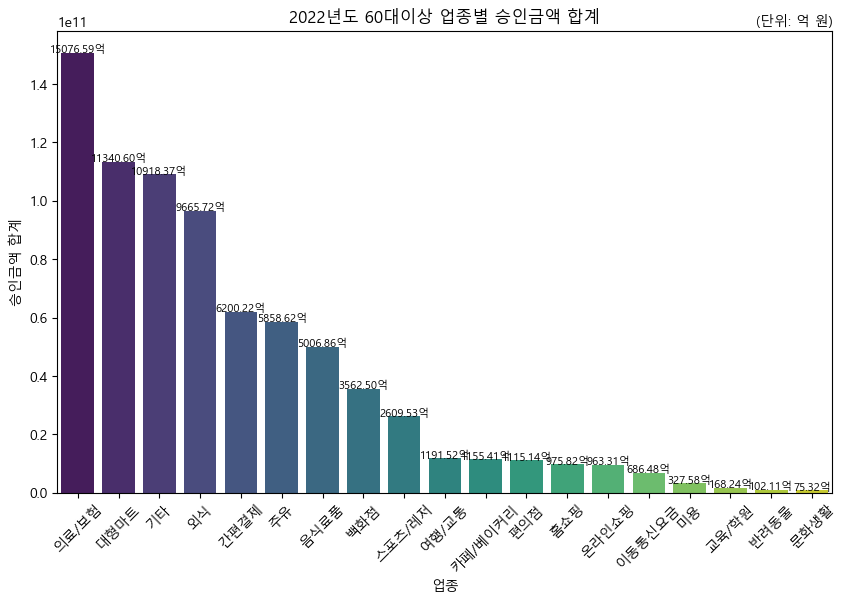

In [63]:
test13 = amount_generation(cc_22_60, "2022", "60대이상")

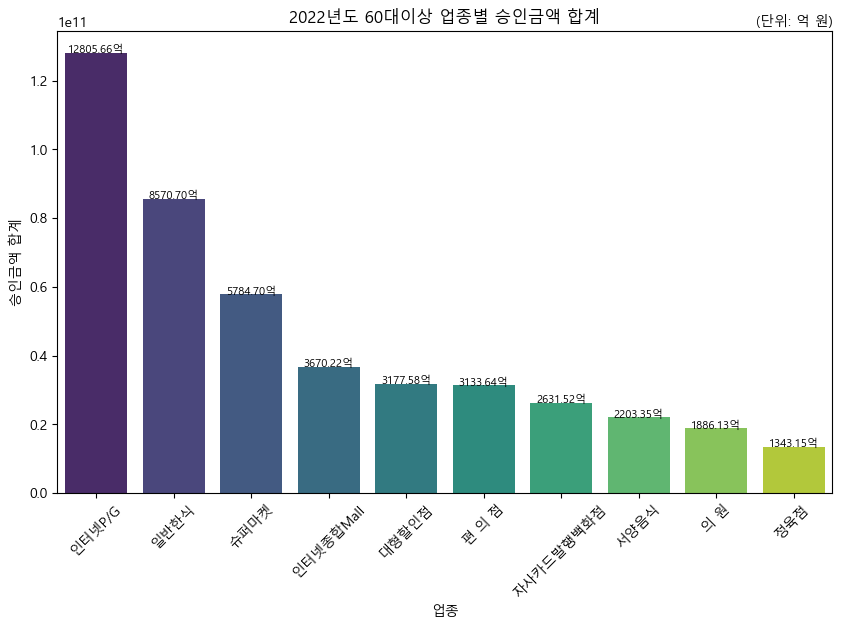

In [77]:
test14 = amount_generation(cc_22_40_raw, "2022", "60대이상", 10)

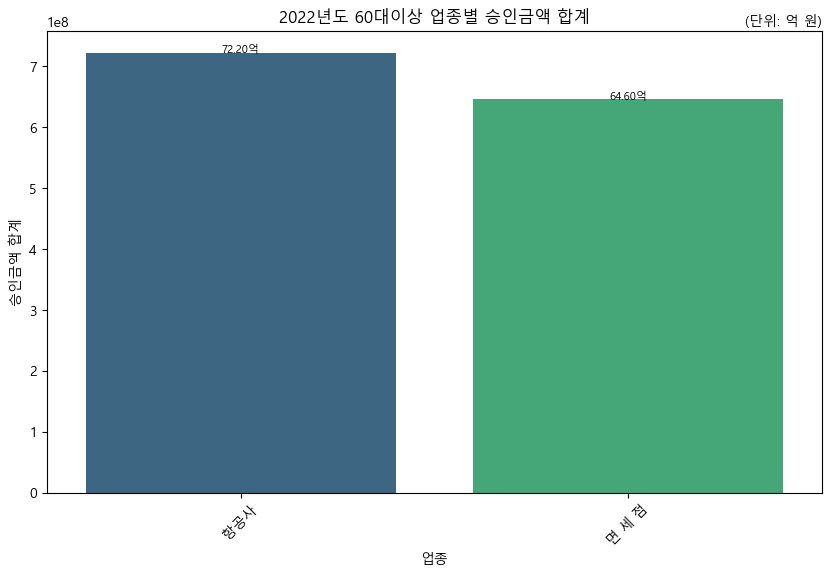

In [81]:
test14_1 = amount_generation(cc_22_60_raw, "2022", "60대이상", columns=['항공사', '면 세 점'])

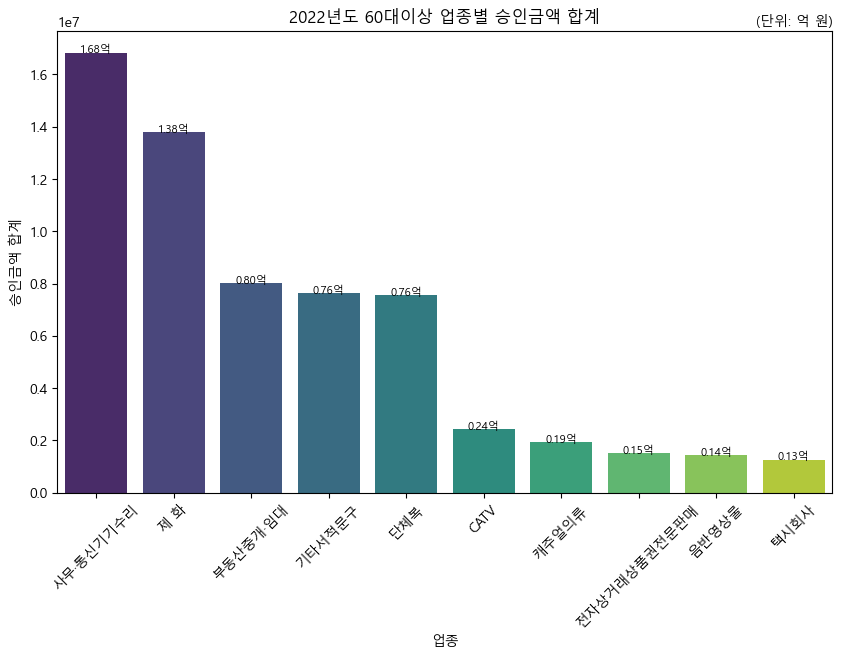

In [82]:
test14_2 = amount_generation(cc_22_60_raw, "2022", "60대이상", bottom=10)

### count barplot

In [83]:
def barplot_counts(df, feature, year, generation):  # 카드 거래량 barplot
    fig, ax = plt.subplots(figsize=(10, 6))
    card_counts = df[feature].value_counts()
    ax = sns.barplot(x=card_counts.index, y=card_counts.values / 1e6, palette="viridis")
    ax.set_title(f"{year}년도 {generation} 카드거래량")
    ax.set_xlabel(f"{feature}")
    ax.set_ylabel("거래량 (백만건)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.text(1, 1.02, "(단위: 백만건)", ha='right', va='center', transform=plt.gca().transAxes, fontsize=10, color="black")
    
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,    # x 위치 (막대 중앙)
            p.get_height() + 0.1,             # y 위치를 더 높게 조정 (막대 위 약간 위로)
            f'{p.get_height():.2f}백만건',    # 백만 단위로 변환된 값 표시
            ha='center',                      # 텍스트 가로 정렬 (중앙 정렬)
            fontsize=8                       # 폰트 크기를 10으로 조정
        )

    ax.get_yaxis().get_major_formatter().set_scientific(False)
    plt.show()

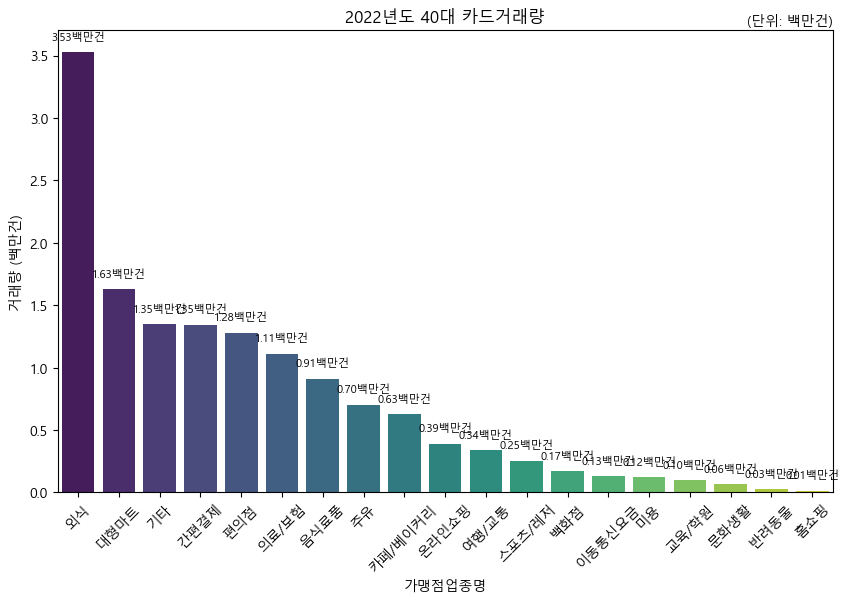

In [88]:
test15 = barplot_counts(cc_22_40, "가맹점업종명" ,"2022", "40대")

### 합계 barplot

In [95]:
def barplot_sum(df, feature1, feature2, year ,generation):
    fig, ax = plt.subplots(figsize=(10, 6))
    total_amounts = df.groupby([feature1])[feature2].sum().reset_index()
    total_amounts_sort = total_amounts.sort_values(by=feature2, ascending=False)
    ax = sns.barplot(x=f'{feature1}', y=f'{feature2}', data=total_amounts_sort, palette="viridis")
    ax.set_title(f"{year}년도 {generation} {feature1}별 {feature2} 합계")
    ax.set_xlabel(f"{feature1}")
    ax.set_ylabel(f"{feature2} 합계")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 1e12:.2f}조',  # 조 단위로 변환 후 소수점 2자리까지 표시
            ha='center',                    # 텍스트 가운데 정렬
            fontsize=8
        )
    ax.text(1, 1.02, "(단위: 조 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
    ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

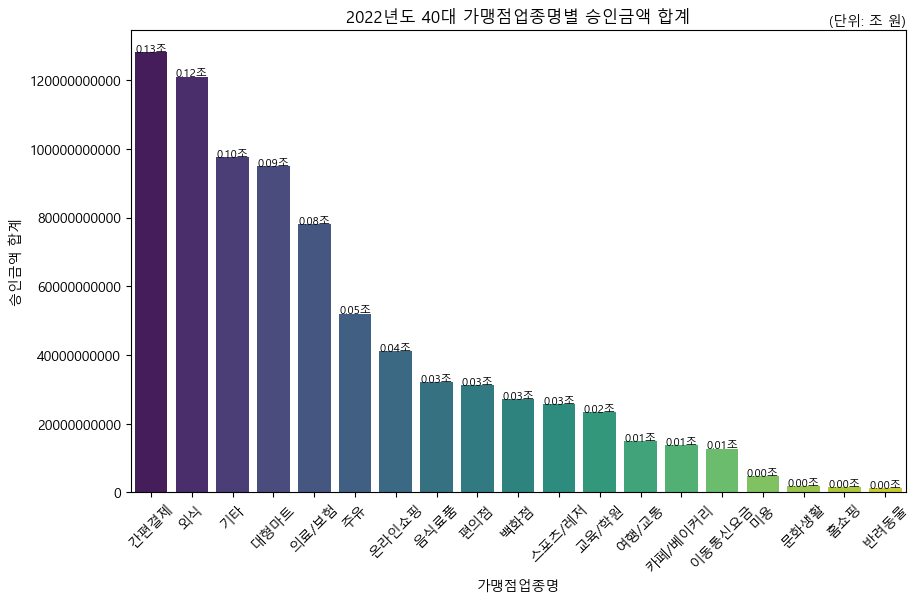

In [96]:
test16 = barplot_sum(cc_22_40, "가맹점업종명","승인금액" ,"2022", "40대")

### 평균 승인 금액표 함수

In [94]:
def table_avg(df, feature1, feature2):
    amounts = df.groupby([feature1])[feature2].sum().reset_index()
    counts = df[feature1].value_counts()
    amounts['카드거래량'] = amounts[feature1].map(counts).astype(float)  # 숫자형으로 변환
    amounts['평균 승인금액'] = amounts[feature2] / amounts['카드거래량']  # 평균 승인금액 계산
    
    #print(amounts[[feature1, feature2, '카드거래량', '평균 승인금액']])
    return amounts

In [98]:
test17 = table_avg(cc_22_40, "가맹점업종명","승인금액" )
test17

,가맹점업종명,승인금액,카드거래량,평균 승인금액
0,간편결제,128056630000,1345074.0,95204.152337
1,교육/학원,23325330000,98760.0,236181.956258
2,기타,97489680000,1346271.0,72414.603003
3,대형마트,94916950000,1627345.0,58326.261487
4,문화생활,1789450000,64648.0,27679.897290
5,미용,4804850000,121886.0,39420.852272
6,반려동물,1269970000,26784.0,47415.247909
7,백화점,27160490000,169215.0,160508.761044
8,스포츠/레저,25631070000,252666.0,101442.497210
9,여행/교통,14940370000,338338.0,44158.119987


### 평균 승인금액 그래프 함수

In [99]:
def barplot_avg(df, feature1, feature2, year, generation):
    amounts = df.groupby([feature1])[feature2].sum().reset_index()
    counts = df[feature1].value_counts()
    amounts['카드거래량'] = amounts[feature1].map(counts).astype(float)  # 숫자형으로 변환
    amounts['평균 승인금액'] = amounts[feature2] / amounts['카드거래량']  # 평균 승인금액 계산
    amounts_sort = amounts.sort_values(by='평균 승인금액', ascending=False)
    amounts_sort['평균 승인금액_만단위'] = amounts_sort['평균 승인금액']

    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.barplot(x=f'{feature1}', y='평균 승인금액', data=amounts_sort, palette="viridis")
    ax.set_title(f"{year}년도 {generation} {feature1}별 평균{feature2}")
    ax.set_xlabel(f"{feature1}")
    ax.set_ylabel("평균 승인금액 (단위: 만 원)")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    ticks = ax.get_yticks()  # 현재 Y축 눈금 가져오기
    ax.set_yticklabels([int(tick / 10000) for tick in ticks])  # 만 단위로 변환하여 설정
    
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 10000:.2f}만원',  # 만 단위로 표시
            ha='center',                    # 텍스트 가운데 정렬
            fontsize=6
        )

    ax.text(1, 1.02, "(단위: 만 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
    
    plt.show()

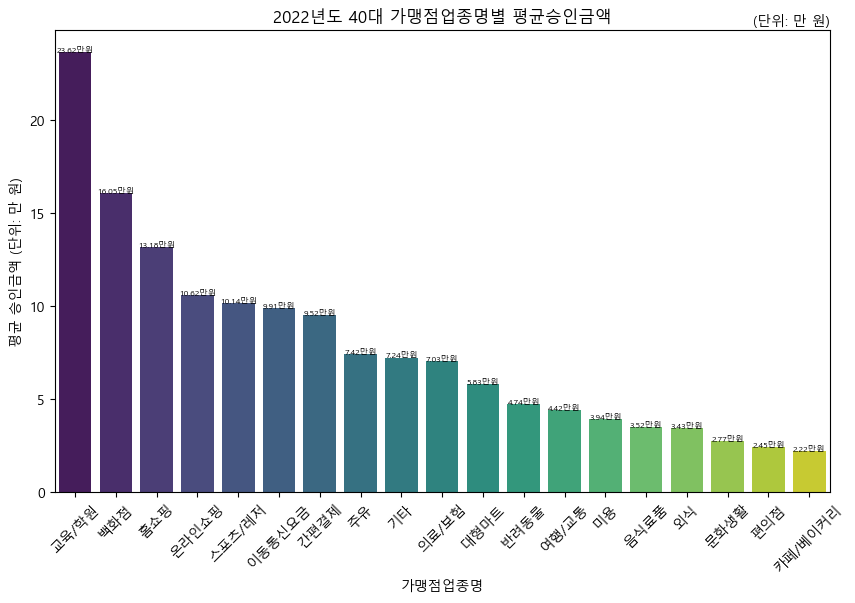

In [100]:
test18 = barplot_avg(cc_22_40, "가맹점업종명","승인금액","2022", "40대" )
test18